<a href="https://colab.research.google.com/github/keithferns98/ML/blob/main/Depression(UnsupervisedL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline 
import seaborn as sns
from sklearn.metrics import silhouette_samples,silhouette_score
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df=pd.read_csv('Depression.csv')
df.head()

,id,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep
0,1,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865
1,2,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688
2,3,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699
3,4,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639
4,5,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518


In [3]:
df.drop('id',axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   simplicity  82 non-null     float64
 1   fatalism    82 non-null     float64
 2   depression  82 non-null     float64
 3   adjsimp     82 non-null     float64
 4   adjfatal    82 non-null     float64
 5   adjdep      82 non-null     float64
dtypes: float64(6)
memory usage: 4.0 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
simplicity,82.0,1.000000,0.500000,0.25068,0.656282,0.882665,1.26940,2.85408
fatalism,82.0,1.000000,0.500001,-0.05837,0.563010,0.977270,1.39152,2.22003
depression,82.0,1.000001,0.500000,0.46953,0.566410,0.824750,1.37373,2.24565
adjsimp,82.0,1.000000,0.499999,0.23569,0.697958,0.968490,1.20179,2.94977
adjfatal,82.0,1.000000,0.500000,0.03012,0.731598,0.924290,1.29912,2.24931
adjdep,82.0,1.000000,0.500000,0.23454,0.596565,0.967845,1.26175,2.78763


In [6]:
from scipy.stats import zscore
df_z=df.apply(zscore)

In [7]:
df_z.head()

,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep
0,-0.141205,-1.296147,-0.807541,-0.484282,-1.797534,-1.169856
1,-0.179157,0.371048,-0.547611,-0.549018,-0.001710,-0.972187
2,-0.938421,-2.129764,-0.937516,-0.761136,-1.935619,-0.589627
3,-0.520827,-1.296147,-0.872518,-0.331588,-1.162751,-0.691450
4,-0.938421,-0.462549,-1.002493,-1.052499,-0.373826,-0.935361


Text(0.5, 1.0, 'Selecting k with elbw method')

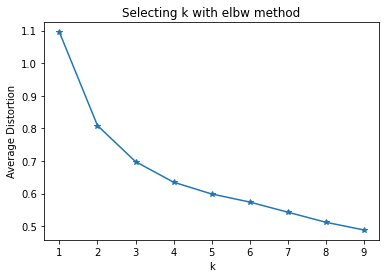

In [8]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
  km=KMeans(n_clusters=k)
  km.fit(df)
  predict=km.predict(df)
  meanDistortions.append(sum(np.min(cdist(df,km.cluster_centers_,'euclidean'),axis=1))/df.shape[0])

plt.plot(clusters,meanDistortions,'*-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with elbw method')

In [9]:
kmeans=KMeans(n_clusters=3)

In [10]:
kmeans.fit(df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
centroids=kmeans.cluster_centers_

In [12]:
centroids

array([[-0.60393647, -0.72164273, -0.90062454, -0.48447657, -0.63244733,
        -0.83635699],
       [-0.00240129,  0.30593064,  0.47588456, -0.15570731,  0.21543758,
         0.41698529],
       [ 1.72480697,  1.30084619,  1.39190785,  1.7621744 ,  1.26973449,
         1.35397533]])

In [13]:
centroids_df=pd.DataFrame(centroids,columns=list(df_z))
print(centroids_df)

   simplicity  fatalism  depression   adjsimp  adjfatal    adjdep
0   -0.603936 -0.721643   -0.900625 -0.484477 -0.632447 -0.836357
1   -0.002401  0.305931    0.475885 -0.155707  0.215438  0.416985
2    1.724807  1.300846    1.391908  1.762174  1.269734  1.353975


In [14]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1], dtype=int32)

In [30]:
df_labels=pd.DataFrame(kmeans.labels_,columns=list(['labels']))


In [31]:
df_labels['labels']=df_labels['labels'].astype('category')
df_labels

,labels
0,0
1,0
2,0
3,0
4,0
...,...
77,1
78,2
79,2
80,1


In [32]:
df_labels.shape

(82, 1)

In [33]:
df_labeled=df.join(df_labels)

In [36]:
df_labeled
df_labeled.head()

,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep,labels
0,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865,0
1,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688,0
2,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699,0
3,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639,0
4,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518,0


In [35]:

df_analaysis=(df_labeled.groupby(['labels'],axis=0)).head(4177)
df_analaysis

,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep,labels
0,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865,0
1,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688,0
2,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699,0
3,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639,0
4,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518,0
...,...,...,...,...,...,...,...
77,1.04302,1.80577,1.47061,0.72117,1.50039,1.14913,1
78,1.79763,2.22003,1.40603,1.59752,2.05016,1.16443,2
79,2.11834,0.77014,2.01960,2.39515,0.88910,2.24452,2
80,1.42033,1.18439,1.47061,1.31493,1.04058,1.37153,1


In [38]:
df_labeled['labels'].value_counts()

0    37
1    32
2    13
Name: labels, dtype: int64

In [40]:
from mpl_toolkits.mplot3d import Axes3D


Text(0.5, 0.92, '3D plot of Kmeans Clustering')

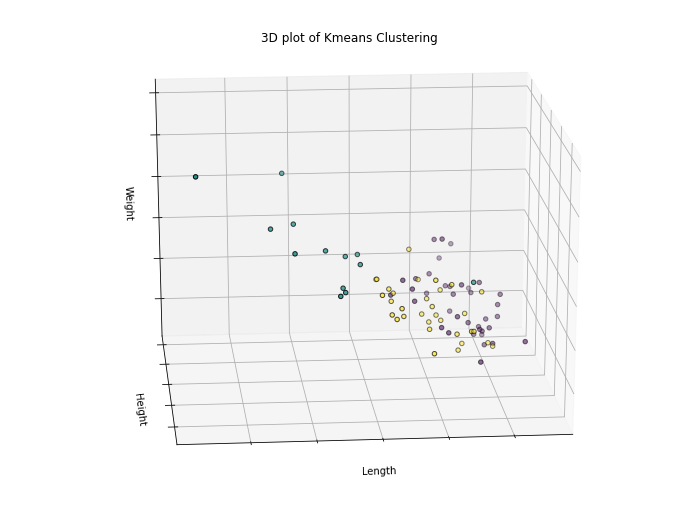

In [44]:
fig=plt.figure(figsize=(10,7))
ax=Axes3D(fig,rect=[0,0,.95,1],elev=20,azim=85)
kmeans.fit(df_z)
labels=kmeans.labels_
ax.scatter(df_z.iloc[:,0],df_z.iloc[:,1],df_z.iloc[:,3],c=labels.astype(np.float),edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of Kmeans Clustering')
